In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from utils.preprocessing import preprocess, split
datapath = "../corpora/Original/"
dataset, sizes, dictionaries, labels = preprocess(datapath)
k_folds = 5
splitted = split(dataset, k_folds)

In [7]:
len(dataset["dTseqs"])

357

# Optimizing FUNgram

In [8]:
from models.fungram import FUNgram
from utils.evaluation import evaluate_model

In [12]:
orders = list(range(1,13))

In [13]:
models = dict()
metrics = dict()
for order in orders:
    print "Order {}".format(order)
    models[order], metrics[order] = evaluate_model(splitted, FUNgram, order=order, sizes=sizes)

Order 1
{'order': 1, 'sizes': (25, 25, 46)}
5.21018621493
5.20429826024
5.21514727176
5.17578844969
5.19566730653
5.25921741046
5.18006304457
5.31722373781
5.21015285953
5.19245811399
Order 2
{'order': 2, 'sizes': (25, 25, 46)}
4.63326152848
4.69286209968
4.63274596363
4.67243752086
4.61901249691
4.75012364368
4.60555185349
4.79813343288
4.63550558442
4.6628587198
Order 3
{'order': 3, 'sizes': (25, 25, 46)}
3.55546435942
3.9374611944
3.54276190119
3.95126293987
3.52914578613
4.06052831511
3.52919358092
4.05065313329
3.55592340716
3.85520304983
Order 4
{'order': 4, 'sizes': (25, 25, 46)}
3.26451669375
4.05407896733
3.25544434007
4.05402818016
3.24846701994
4.19342904136
3.24384203564
4.19440051369
3.26479438333
3.96972951132
Order 5
{'order': 5, 'sizes': (25, 25, 46)}
2.91378928355
4.3444165769
2.90112586136
4.37436148232
2.90211981795
4.58730951842
2.89716461516
4.59299024955
2.90832148845
4.29321464238
Order 6
{'order': 6, 'sizes': (25, 25, 46)}
2.06396462012
5.12353936032
2.056526989

/Users/toroloco/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


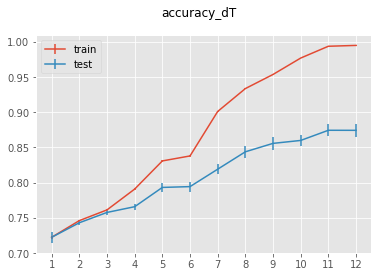

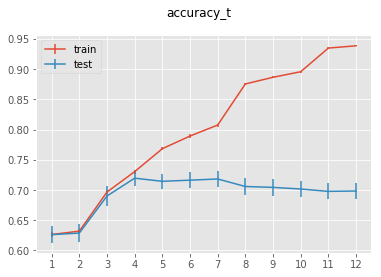

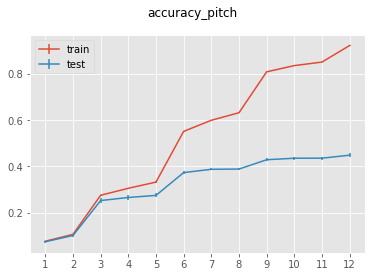

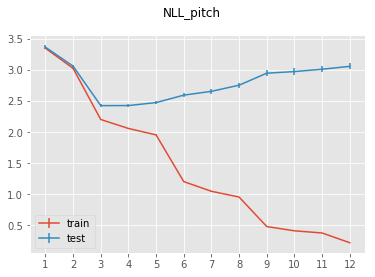

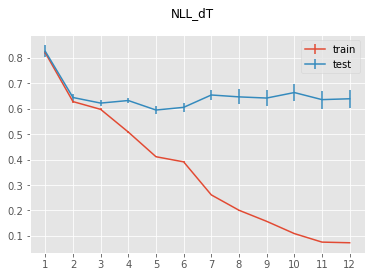

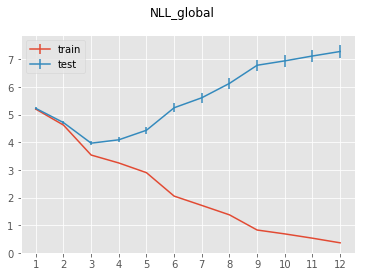

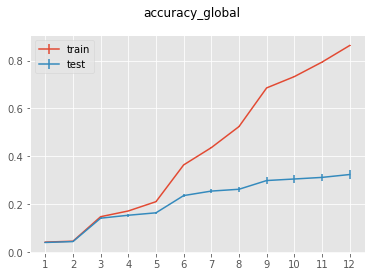

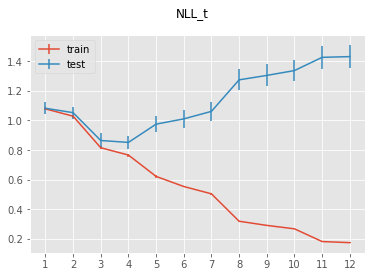

In [14]:
keys = metrics[3]['train'].keys()
for k in keys:
    fig, ax = plt.subplots()
    ax.set_xticks(orders)
    means_train = [np.mean(metrics[o]['train'][k]) for o in orders]
    stds_train = [np.std(metrics[o]['train'][k]) for o in orders]
    means_test = [np.mean(metrics[o]['test'][k]) for o in orders]
    stds_test = [np.std(metrics[o]['test'][k]) for o in orders]
    ax.errorbar(orders, means_train, stds_train, label='train')
    ax.errorbar(orders, means_test, stds_test, label='test')
    fig.suptitle(k)
    ax.legend()
    fig.show()

In [21]:
del models[12]
del models[11]
del models[10]

# INgram

In [22]:
from models.ingram import INgram

In [23]:
orders_in = orders

In [24]:
models_in = dict()
metrics_in = dict()
for order in orders_in:
    print "Order {}".format(order)
    models_in[order], metrics_in[order] = evaluate_model(splitted, INgram, order=order)

Order 1
{'order': 1}
4.73178962676
4.68686672843
4.72221283031
4.71680623354
4.68511350761
4.86773598364
4.68936176528
4.84240218097
4.72213158041
4.71081469312
Order 2
{'order': 2}
3.92744406718
4.53000067512
3.92035210204
4.67839152657
3.88443148887
4.73268257216
3.89088217071
4.75050433861
3.92183159117
4.53772535887
Order 3
{'order': 3}
2.87004379146
5.23766973158
2.87289026353
5.33216646136
2.81699454158
5.5293158666
2.83164369286
5.48978404067
2.85881108304
5.19082623664
Order 4
{'order': 4}
2.15918466849
5.84948727282
2.15922101847
5.87269291196
2.10799762036
6.18452103502
2.12025491472
6.07994384356
2.14229155426
5.85451037707
Order 5
{'order': 5}
1.7626139548
6.21588731189
1.75543011522
6.27013255122
1.71275240815
6.66694505587
1.72307902005
6.51344688711
1.7420293657
6.30936969369
Order 6
{'order': 6}
1.53638505897
6.48269110514
1.52756067108
6.5134583661
1.49275664389
6.99100791124
1.50029219787
6.76199452237
1.51623199792
6.60316410096
Order 7
{'order': 7}
1.39514459902
6.6

In [25]:
del models_in[10]
del models_in[11]
del models_in[12]

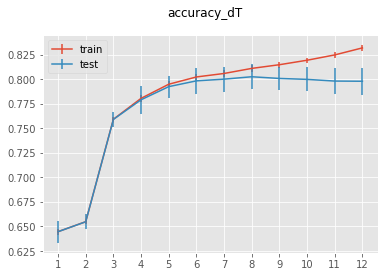

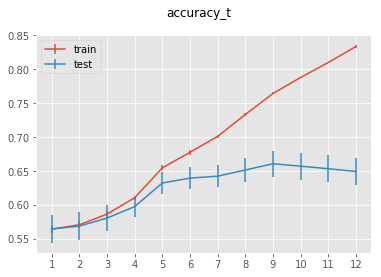

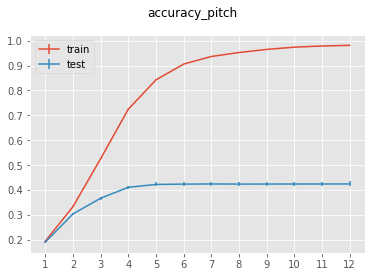

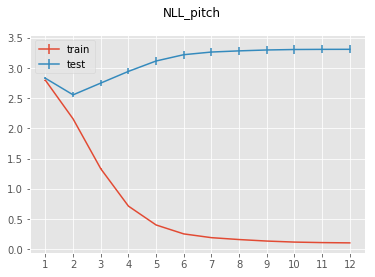

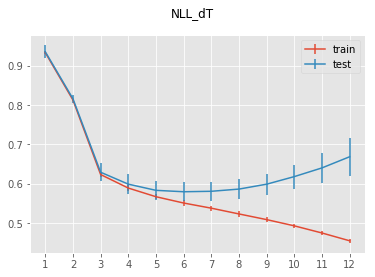

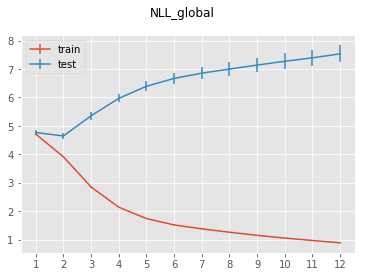

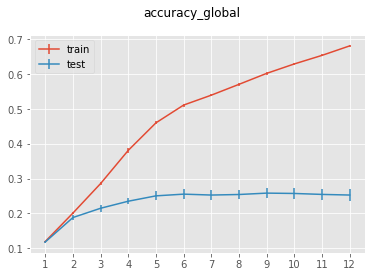

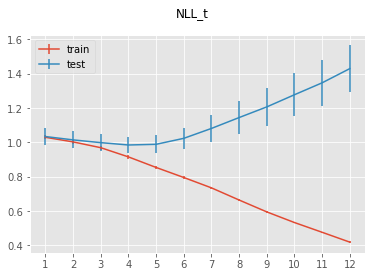

In [27]:
keys = metrics_in[3]['train'].keys()
for k in keys:
    fig, ax = plt.subplots()
    ax.set_xticks(orders_in)
    means_train = [np.mean(metrics_in[o]['train'][k]) for o in orders_in]
    stds_train = [np.std(metrics_in[o]['train'][k]) for o in orders_in]
    means_test = [np.mean(metrics_in[o]['test'][k]) for o in orders_in]
    stds_test = [np.std(metrics_in[o]['test'][k]) for o in orders_in]
    ax.errorbar(orders_in, means_train, stds_train, label='train')
    ax.errorbar(orders_in, means_test, stds_test, label='test')
    fig.suptitle(k)
    ax.legend()
    fig.show()

# Comparison

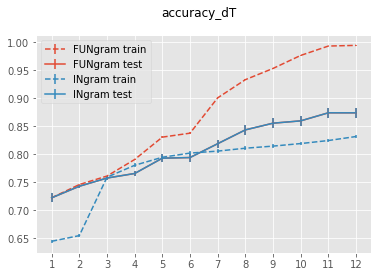

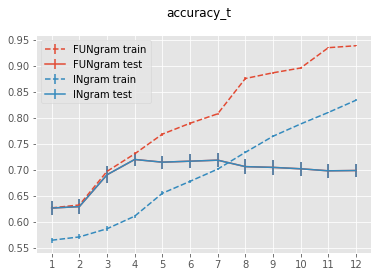

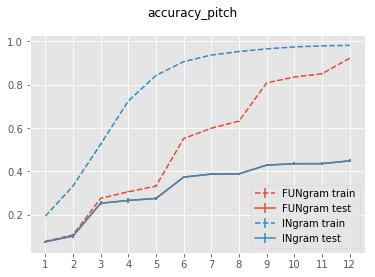

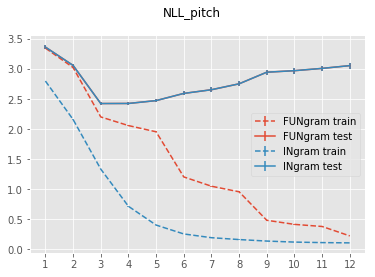

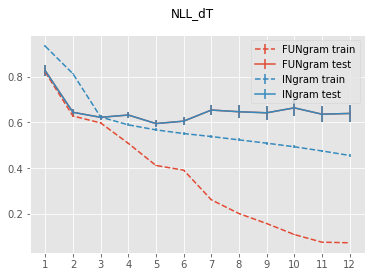

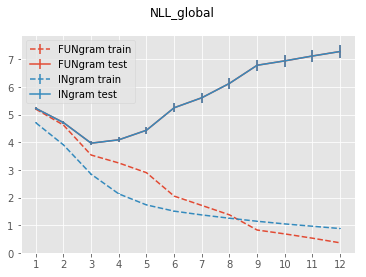

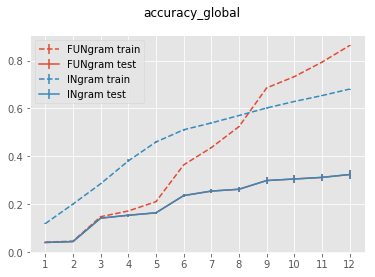

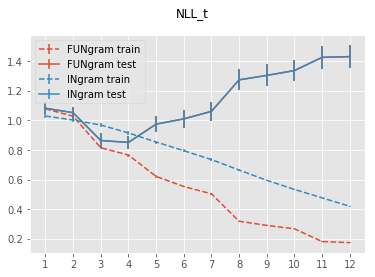

In [28]:
keys = metrics_in[3]['train'].keys()
for k in keys:
    fig, ax = plt.subplots()
    ax.set_xticks(orders_in)
    means_train = [np.mean(metrics[o]['train'][k]) for o in orders]
    means_train_in = [np.mean(metrics_in[o]['train'][k]) for o in orders]
    stds_train = [np.std(metrics[o]['train'][k]) for o in orders]
    stds_train_in = [np.std(metrics_in[o]['train'][k]) for o in orders]
    means_test = [np.mean(metrics[o]['test'][k]) for o in orders]
    means_test_in = [np.mean(metrics_in[o]['test'][k]) for o in orders_in]
    stds_test = [np.std(metrics[o]['test'][k]) for o in orders]
    stds_test_in = [np.std(metrics_in[o]['test'][k]) for o in orders_in]
    ax.errorbar(orders, means_train, stds_train, label='FUNgram train', c='C0', linestyle='--')
    ax.errorbar(orders, means_test, stds_test, label='FUNgram test', c='C0')
    ax.errorbar(orders, means_train_in, stds_train_in, label='INgram train', c='C1', linestyle='--')
    ax.errorbar(orders, means_test, stds_test, label='INgram test', c='C1')
    fig.suptitle(k)
    ax.legend()
    fig.show()

# Generation

In [14]:
selModelFun = models[9][0]
gen_data_fun = selModelFun.generate(n_songs=50, write_MIDI=True, dictionaries=dictionaries, path=datapath+"gen/")
selModelIn = models_in[3][0]
gen_data_in = selModelIn.generate(n_songs=50, write_MIDI=True, dictionaries=dictionaries, path=datapath+"gen/")

0.007408010862638871

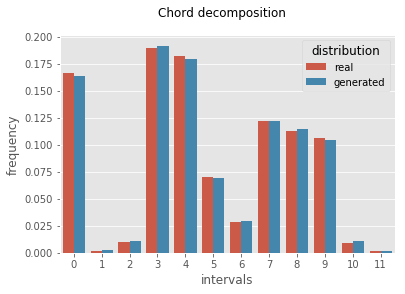

In [16]:
from utils.evaluation import analyze_chords
analyze_chords(dataset, gen_data_fun, show_plot=True)

0.23284150553679164

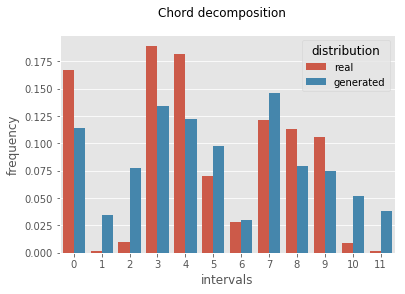

In [17]:
analyze_chords(dataset, gen_data_in, show_plot=True)

0.01094871600192225

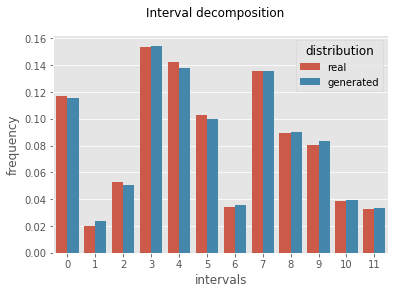

In [18]:
from utils.evaluation import analyze_intervals
analyze_intervals(dataset, gen_data_fun, show_plot=True)

0.01805889541537402

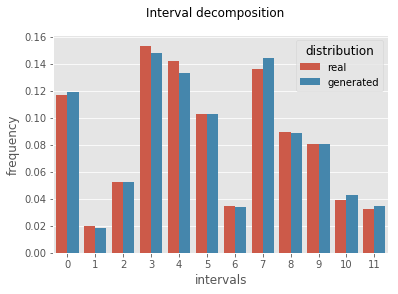

In [19]:
analyze_intervals(dataset, gen_data_in, show_plot=True)

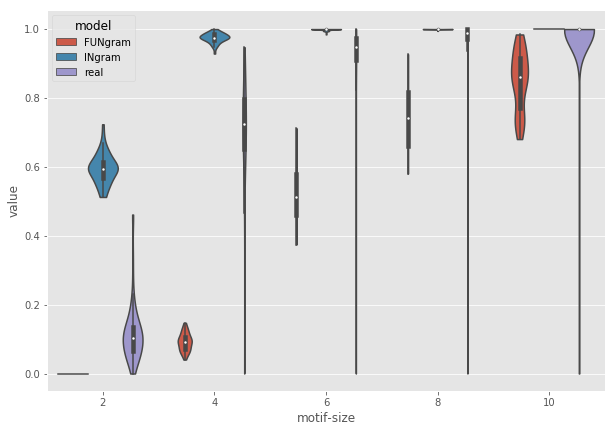

In [24]:
from utils.novelty import comparison_novelties
_ = comparison_novelties(splitted[0]['train'], [splitted[0]['test'], gen_data_fun, gen_data_in], 
                     ["real", "FUNgram", "INgram"], motifs=(2,4,6,8,10))